In [1]:
import pandas_profiling as pp
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

pd.set_option('display.max_columns', 100)

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

In [2]:
bc_survival_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')

In [3]:
bc_survival_df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
bc_survival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [5]:
bc_survival_df.describe(include = 'all')

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### 1.1 General Observation

There are 4 columns in the dataset. Total rows are 306. Normal range of Positive Axillary Node is 0-35 but in dataset its ranging from 0-52. Status column has 2 distinct values 1 and 2.

In [6]:
profile = pp.ProfileReport(bc_survival_df)
profile.to_file(outputfile="preprofile.html") 

<a id=section306></a> 
### 1.2 Initial observations:

- Summary of data types in this dataset:
 - <em>Integer</em>: <strong>4</strong>
- <strong>Age</strong> Age values are standard
- <strong>Years Of Operation</strong> has minimum value 58 and maximum value of 69
- <strong>Positive Axillary Nodes</strong> has few high values which seems to be unrealistic
- <strong>Status</strong> has only two values 1 or 2

In [7]:
print("'Age'")                                                                
print("Minimum value: ", bc_survival_df["Age"].min())
print("Maximum value: ", bc_survival_df["Age"].max())
print("How many values are NaN?: ", pd.isnull(bc_survival_df['Age']).sum())

'Age'
('Minimum value: ', 30)
('Maximum value: ', 83)
('How many values are NaN?: ', 0)


### 1.3 Final observations:

We need to standardize below mentioned columns in this dataset:
- <strong>Pos_axillary_nodes</strong> Usually value of Positive Axillary Nodes is between 0-35. We have some outliers which we need to standardize

## 2 Data Normalization

#### 2.1 Finding Missing data

In [8]:
total = bc_survival_df.isnull().sum().sort_values(ascending=False)
percent = (bc_survival_df.isnull().sum()/bc_survival_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                    Total  Percent
Status                  0      0.0
Pos_axillary_nodes      0      0.0
Years_of_operation      0      0.0
Age                     0      0.0


#### No missing data in any of the columns

#### 2.2 Removing outliers for column Positive Axillary Nodes

In [9]:
def clean_pan(Pos_axillary_nodes):                             # Create a new column "valid_pos_axl_node" that replaces out-of-range values for Positive Axillary Nodes with "NaN"
    if Pos_axillary_nodes>=0 and Pos_axillary_nodes<=35:                      # Value of Positive Axillary Node usually between 0-35 hence using this range
        return Pos_axillary_nodes
    else:
        return np.nan
bc_survival_df['valid_pos_axl_node'] = bc_survival_df['Pos_axillary_nodes'].apply(clean_pan)

print("'Positive Axillary Node'")                                  # Check out the new column and make sure it looks right
print("Minimum value: ", bc_survival_df["valid_pos_axl_node"].min())
print("Maximum value: ", bc_survival_df["valid_pos_axl_node"].max())
print("How many values are NaN?: ", pd.isnull(bc_survival_df['valid_pos_axl_node']).sum())
print("Frequency table for valid_pos_axl_node:")
bc_survival_df["valid_pos_axl_node"].value_counts().sort_index(0)

'Positive Axillary Node'
('Minimum value: ', 0.0)
('Maximum value: ', 35.0)
('How many values are NaN?: ', 2)
Frequency table for valid_pos_axl_node:


0.0     136
1.0      41
2.0      20
3.0      20
4.0      13
5.0       6
6.0       7
7.0       7
8.0       7
9.0       6
10.0      3
11.0      4
12.0      2
13.0      5
14.0      4
15.0      3
16.0      1
17.0      1
18.0      1
19.0      3
20.0      2
21.0      1
22.0      3
23.0      3
24.0      1
25.0      1
28.0      1
30.0      1
35.0      1
Name: valid_pos_axl_node, dtype: int64

#### Only two values were outliers which were removed

#### 2.3 Adding grouping of Age to determine few statistics

In [10]:
bc_survival_df['age_group'] = pd.cut(bc_survival_df['Age'],
                         [30,40,50,60,70,80,90],
                         labels=['30-39','40-49','50-59','60-69','70-79','80+'], include_lowest=True)

In [11]:
bc_survival_df.head(10)

,Age,Years_of_operation,Pos_axillary_nodes,Status,valid_pos_axl_node,age_group
0,30,64,1,1,1.0,30-39
1,30,62,3,1,3.0,30-39
2,30,65,0,1,0.0,30-39
3,31,59,2,1,2.0,30-39
4,31,65,4,1,4.0,30-39
5,33,58,10,1,10.0,30-39
6,33,60,0,1,0.0,30-39
7,34,59,0,2,0.0,30-39
8,34,66,9,2,9.0,30-39
9,34,58,30,1,30.0,30-39


## 3 Data Interpretation 

### 3.1 Ploting Age group v/s Survival status

Text(0.5,1,'Age Group vs Survival status')

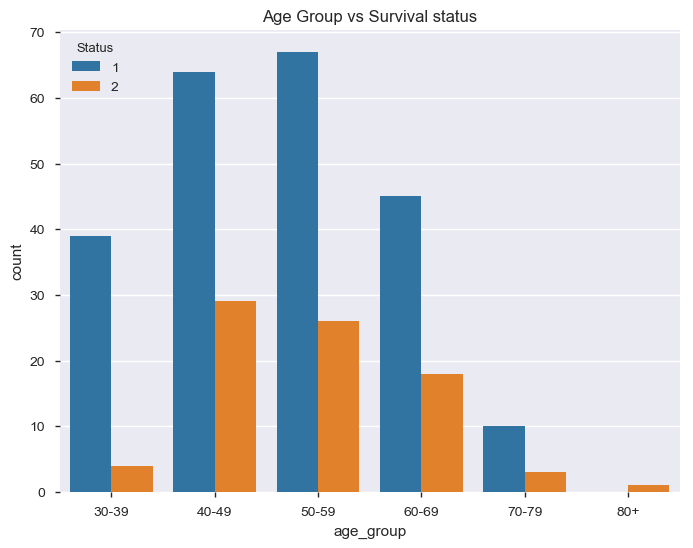

In [12]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bc_survival_df,x = 'age_group', hue='Status')
plt.title('Age Group vs Survival status')

#### Observation:

Survival status is more when it comes to survival of 5 or more years. Also there is a decreasing trend in survival with age.

### 3.2 Ploting age distribution of sample

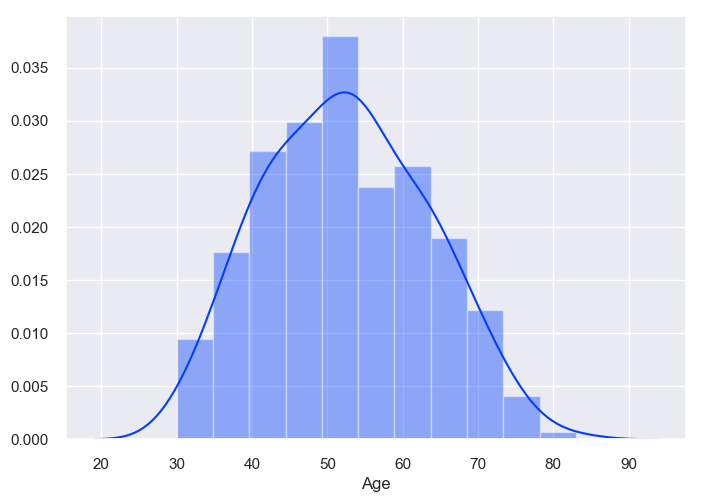

In [13]:
sns.set(color_codes=True)                                                # Plot a histogram of the Samples' ages
sns.set_palette(sns.color_palette("bright"))
sns.distplot(bc_survival_df['Age']);

#### Observation

Cancer is more likely to happen within 40-70 age group of females.

### 3.3 Ploting Year of operation and count of operations

Text(0.5,1,'Year Of Operation V/s count')

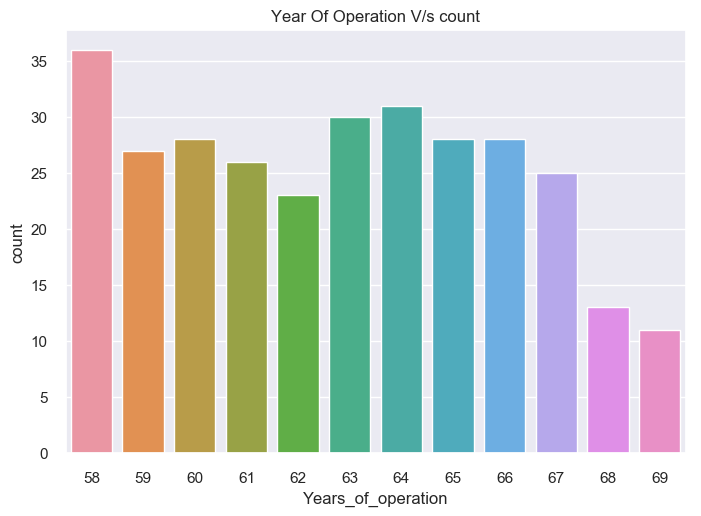

In [14]:
#fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bc_survival_df,x = 'Years_of_operation')
plt.title('Year Of Operation V/s count')

#### Observation

Number of operation took place is pretty uniformly distributed over the period of time with slightly lesser number of cases towards late 90s

### 3.4 Plotting Total number of Positive Axillary Nodes v/s Age

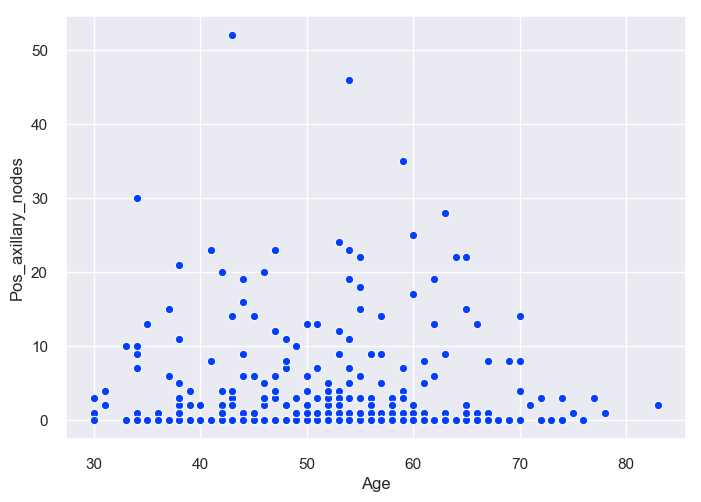

In [15]:
sns.scatterplot(y="Pos_axillary_nodes",x="Age",data=bc_survival_df)

#### Observation

Mostly data is concentrated towards the bottom of the chart i.e. between 0 to 5. Hence women generally have 0-5 Positive Axillary Nodes when tested.

### 3.5 Heat map showing relationship between different data points

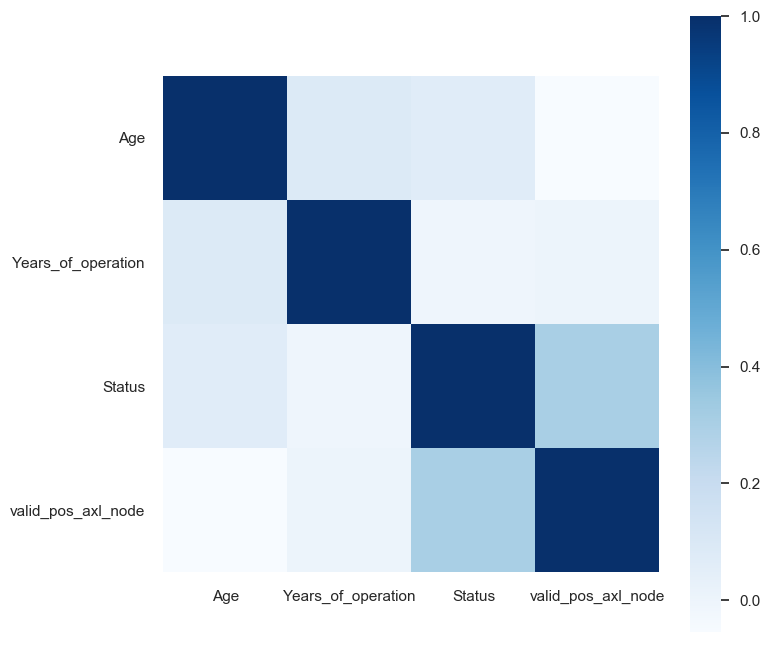

In [16]:
bc_survival_cpy = bc_survival_df.copy(deep=True) 
bc_survival_cpy = bc_survival_cpy.drop(['Pos_axillary_nodes'], axis= 1)
corr_var = bc_survival_cpy.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_var,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation

Year of operation and Survival status has mild positive relationship with Age of women. Survival status has positive relationship with Positive Axillary nodes detected. There is no relationship between Positive Axillary nodes detected and Age of women.